[ 4.98825521 29.67987527 92.65908015  8.27756078 44.76510038  2.51769725]


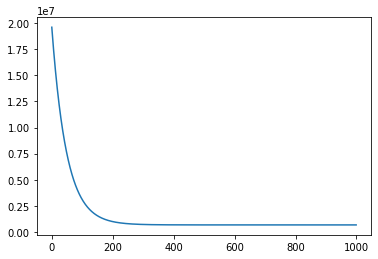

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/content/Train.csv')

one_arr=np.ones((df.shape[0],))

x = np.c_[one_arr, df['feature_1'], df['feature_2'], df['feature_3'],  df['feature_4'], df['feature_5']]

y=df['target'].values
y=y.reshape((-1,))

def hypothesis(x,theta):
  return np.dot(x,theta)

def error(x,theta,y):
  error=0.0
  m=x.shape[0]

  for i in range(m):
    hx=hypothesis(x[i],theta)
    error+=(hx-y[i])**2

  return error

def gradient(x,theta,y):
  m=x.shape[0]
  grad=np.zeros((theta.shape))

  for i in range(m):
    hx=hypothesis(x[i],theta)
    grad=grad+(hx-y[i])*x[i]

  return grad/m

def gradientDescent(x,y,learning_rate=0.01):
  theta=np.zeros((x.shape[1],))
  error_list=[]
  theta_list=[]
  for i in range(1000):
    err=error(x,theta,y)
    grad=gradient(x,theta,y)

    theta_list.append(theta)
    error_list.append(err)

    theta=theta-(learning_rate)*grad

  return theta,error_list,theta_list

final_theta,error_list,theta_list=gradientDescent(x,y)
plt.plot(error_list)
print(final_theta)


